In [1]:
import pandas as pd
from basilisk import Node, BN

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

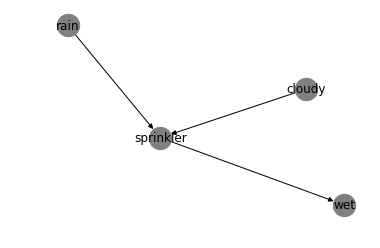

In [4]:
# construct graph

C = Node("cloudy")
R = Node("rain")
S = Node("sprinkler", [C, R])
W = Node("wet", [S])

ls_n = [C, R, S, W]

model = BN(ls_n)
model.show(node_size=500, node_color='gray')

In [9]:
p = {'True': [.1]}
C.specify_cpt(p)

p = {'True': [.9]}
R.specify_cpt(p)

p = {'rain': [True, True, False, False], 
     'cloudy': [True, False, True, False],
    'True':[.2, .4, .1, .8]}
S.specify_cpt(p)

p = {'sprinkler': [True, False], 'True':[.2, .4]}
W.specify_cpt(p)

True

True

True

True

In [11]:
S.cpt

,rain,cloudy,True,False
0,True,True,0.2,0.8
1,True,False,0.4,0.6
2,False,True,0.1,0.9
3,False,False,0.8,0.2


In [12]:
# generate batch samples
leaf_node = W
b = model.generate_samples(leaf_node, n_samples=1000)
b.head()

100%|██████████| 1000/1000 [00:13<00:00, 76.15it/s]


,rain,cloudy,sprinkler,wet
0,True,False,False,False
1,True,False,True,False
2,True,False,True,False
3,True,False,True,False
4,True,False,False,False


In [15]:
b.to_csv("obs_v2.csv", index=None)

In [16]:
c = pd.read_csv("obs_v2.csv")
c.head()

,rain,cloudy,sprinkler,wet
0,True,False,False,False
1,True,False,True,False
2,True,False,True,False
3,True,False,True,False
4,True,False,False,False


In [7]:
# corresponding joint probability should be similar to computed joint probability
joint_obs = pd.crosstab(b["cloudy"], b["rain"], normalize = 'index').reset_index()
joint_obs

rain,cloudy,False,True
0,False,0.801282,0.198718
1,True,0.169173,0.830827
